### Ch4 Figure3

In [1]:
# Correlation also has the power to help your team question its assumptions. You might assume that the people who spend the most on your website will also be your happiest customers. That might not be the case. In fact there might be a negative correlation between the two. Maybe the people who spend the most actually have the most unrealistic expectations. They're easier to disappoint and more likely to leave negative feedback.

means = [150,0]  
stds = [15, .2]
corr = -0.8
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 100).T
df = pd.DataFrame(m.transpose(), columns=['Time Elapsed (Seconds)', 'Sentiment Score'])
# df.to_csv('csv_output/ch4_fig3.csv')
df = pd.read_csv('csv_output/ch4_fig3.csv')
df.head()

,Unnamed: 0,Time Elapsed (Seconds),Sentiment Score
0,0,182.414151,-0.328051
1,1,160.983555,-0.137759
2,2,142.419251,0.131667
3,3,140.911241,0.188568
4,4,159.168159,-0.009450


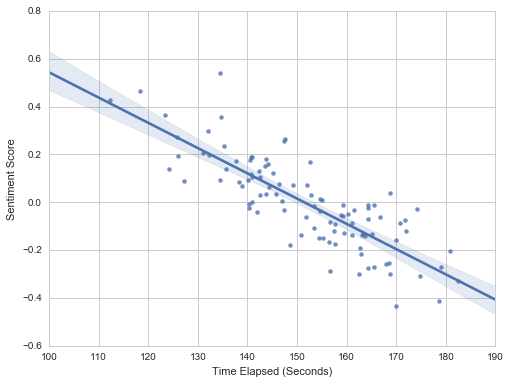

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

df = pd.read_csv('csv_output/ch4_fig3.csv')

f, ax = plt.subplots(1,1, figsize=(8,6))
sns.regplot(data=df, x='Time Elapsed (Seconds)', y='Sentiment Score', ax=ax);
f.savefig('svg_output/ch4_fig3.svg', format='svg')

The more time a visitor spent on website, the lower the sentiment score of the feedback is.

In [3]:
%load_ext rpy2.ipython

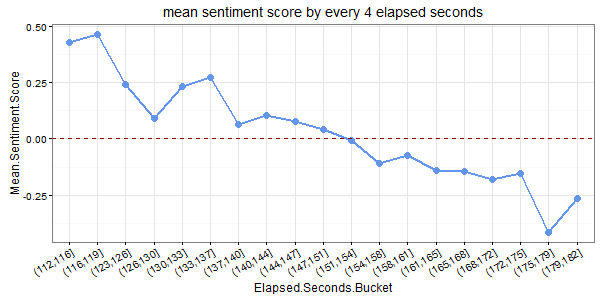

In [4]:
%%R -w 600 -h 300 -u px

df = read.csv('csv_output/ch4_fig3.csv')
df$time.elapsed.bucket = cut(df$Time.Elapsed..Seconds., 20)
df2 = aggregate(df$Sentiment.Score, by=list(df$time.elapsed.bucket), mean)
colnames(df2)=c('Elapsed.Seconds.Bucket', 'Mean.Sentiment.Score')

head(df2)

require(ggplot2)
ggplot(df2, aes(x=Elapsed.Seconds.Bucket,y=Mean.Sentiment.Score,group = 1)) + geom_line(size = 1, color='cornflowerblue') + geom_point(size = 3, color='cornflowerblue')+ geom_hline(yintercept = 0, color='darkred', linetype = 2) + ggtitle('mean sentiment score by every 4 elapsed seconds') + theme_bw() + theme(axis.text.x = element_text(angle = 30, hjust= 1))
# ggsave("svg_output/ch4_fig3_R.svg")